In [20]:
import matplotlib
import scipy.signal as ss

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm_notebook as tqdm

from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn import svm

In [4]:
def pca(x_train, n_dim):
    pca = decomposition.PCA(n_components=n_dim)
    x_train2 = x_train.reshape(x_train.shape[0], -1)
    pca.fit(x_train2)
    x_train2 = pca.transform(x_train2)
    return x_train2
    
    
def tsne(x_train, n_dim):
    x_train2 = x_train.reshape(x_train.shape[0], -1)
    X_embedded = TSNE(n_components=n_dim).fit_transform(x_train2)
    return X_embedded
        

def visualize2d(x_train,s_train, inten, ms):
    plt.figure()
    if(inten == True):
        plt.scatter(x_train[:,0],x_train[:,1],c = np.arange(s_train.shape[0]), marker=".", s = ms)
    else:
        plt.scatter(x_train[:,0],x_train[:,1],c = s_train, marker=".", s = ms)
    plt.show()
        
    
def visualize3d(x_train,s_train,inten, ms):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = "3d")
    if(inten == True):
        ax.scatter(x_train[:, 0], x_train[:, 1], x_train[:, 2], c = np.arange(s_train.shape[0]) , marker = ".", s = ms)
    else:
        ax.scatter(x_train[:, 0], x_train[:, 1], x_train[:, 2], c = s_train , marker = ".", s = ms)

    ax.set_xlabel("TEST1")
    ax.set_ylabel("TEST2")
    ax.set_zlabel("TEST3")
    plt.show()

# Visualizing a single person across section

In [3]:
root = "C:\\Users\\Chahat\\Desktop\\dl\\data"
x_train = np.load(os.path.join(root, "x_train.npy"))
y_train = np.load(os.path.join(root, "y_train.npy"))
s_train = np.load(os.path.join(root, "s_train.npy"))

<IPython.core.display.Javascript object>


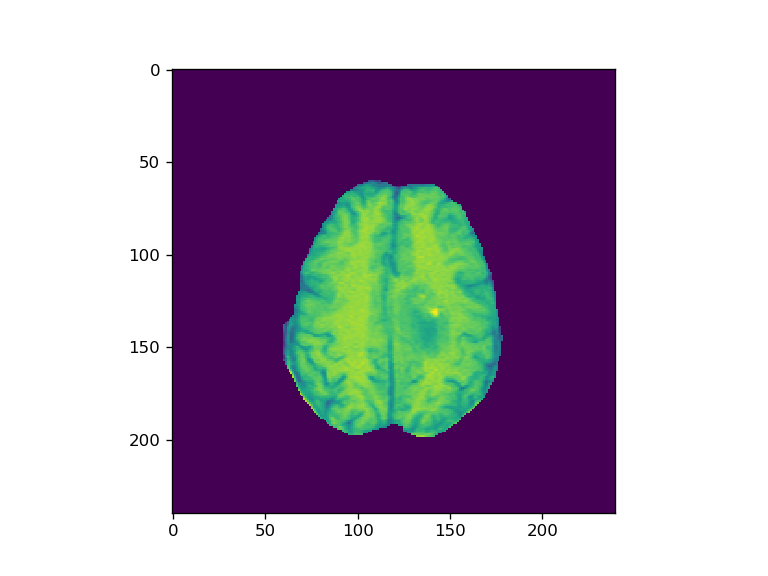

In [39]:
fig = plt.figure()
plt.imshow(x_train[70,:,:])
plt.show()

<IPython.core.display.Javascript object>


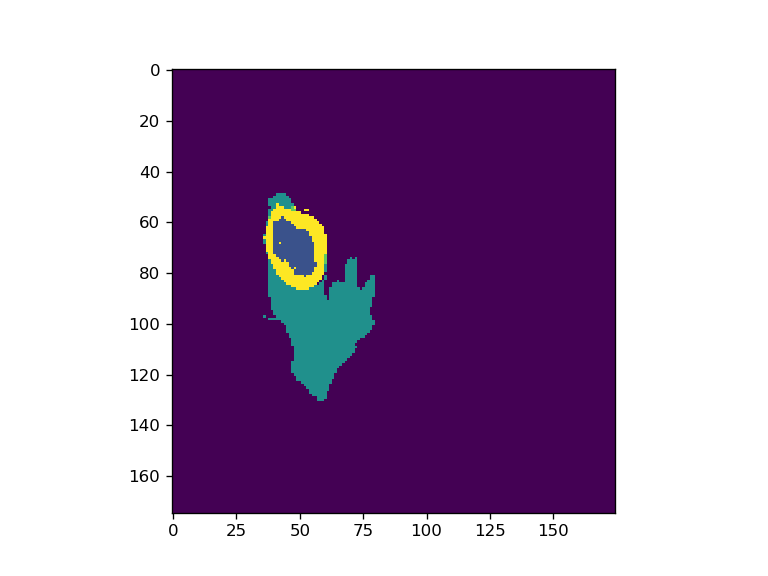

In [6]:
fig = plt.figure()
plt.imshow(y_train[70,:,:])
plt.show()

In [23]:
x_single_denoised = ss.medfilt2d(x_train[70,:,:].astype(float))

<IPython.core.display.Javascript object>


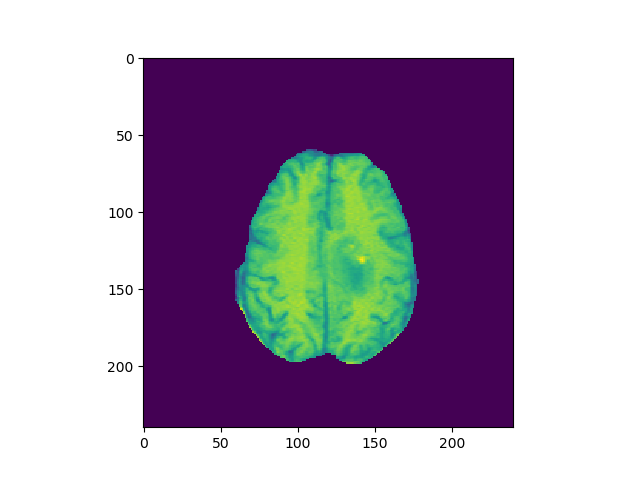

In [24]:
fig = plt.figure()
plt.imshow(x_train[70,:,:])
plt.show()

In [26]:
x_diff = x_single_denoised - x_train[70,:,:]

<IPython.core.display.Javascript object>


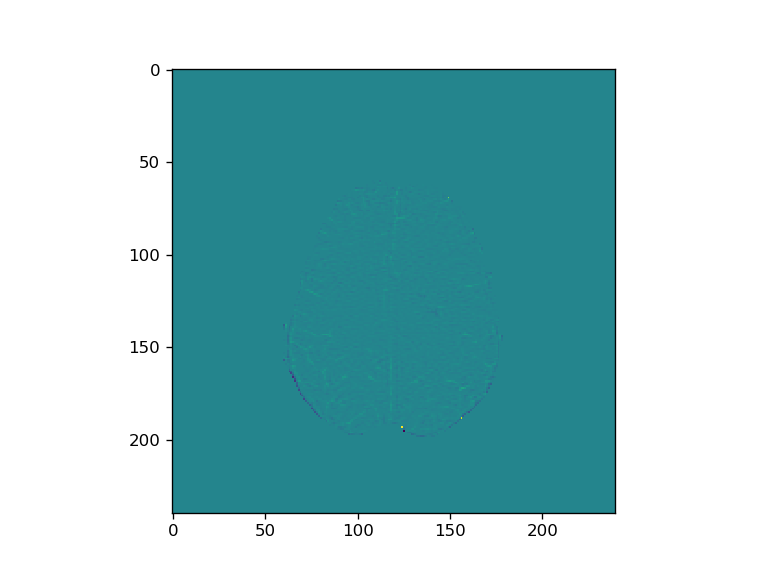

In [40]:
fig = plt.figure()
plt.imshow(x_diff)
plt.show()

In [5]:
print(s_train[70])

True


In [6]:
x_single = x_train[:120,:,:]
s_single = s_train[:120]

In [7]:
x_single_pca_2d = pca(x_single,n_dim = 2) 
x_single_pca_3d = pca(x_single,n_dim = 3)

<IPython.core.display.Javascript object>


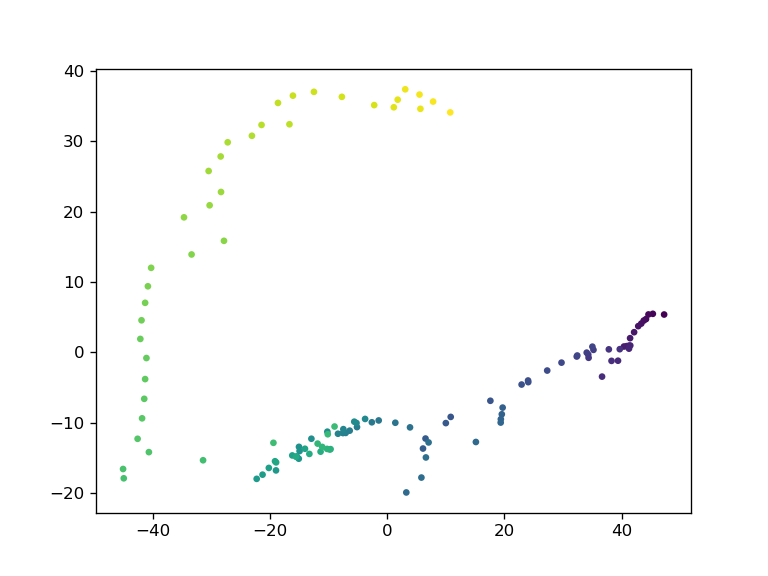

In [8]:
visualize2d(x_single_pca_2d, s_single, inten = True)

<IPython.core.display.Javascript object>


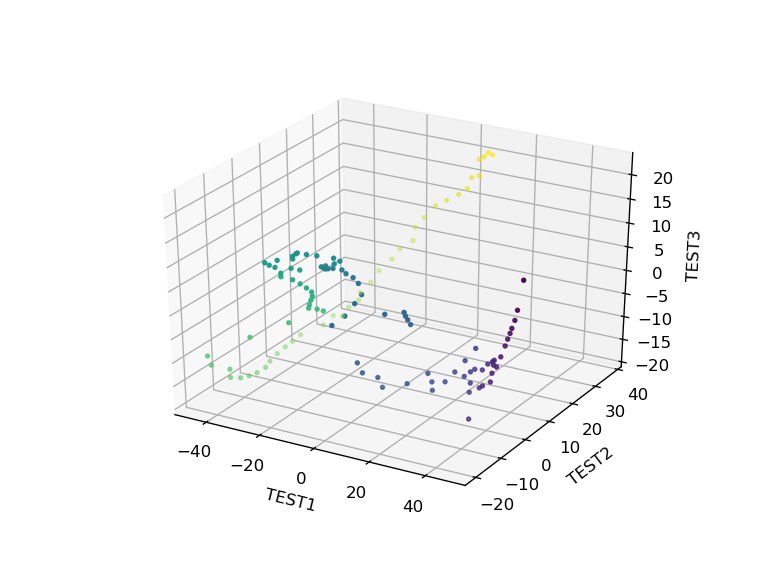

In [18]:
visualize3d(x_single_pca_3d, s_single, inten = True)

# Visualizing Shuffled Data

In [6]:
path = "C:\\Users\\Chahat\\Desktop\\daata"
x_path = os.path.join(path, "Train_x.npy")
y_path = os.path.join(path, "Train_y.npy")
x_train = np.load(x_path)
y_train = np.load(y_path)

In [7]:
print(x_train.shape)
print(y_train.shape)

(38223, 240, 240)
(38223, 240, 240)


In [8]:
means = x_train.sum(axis = 1).sum(axis = 1) / (240 * 240)
indices = means>0
x_train = x_train[indices]
y_train = y_train[indices]

In [9]:
print(x_train.shape)
print(y_train.shape)

(33633, 240, 240)
(33633, 240, 240)


In [10]:
x_data = x_train[:2000,:,:]
y_data = y_train[:2000,:,:]

In [13]:
print(x_data.shape)
print(y_data.shape)

(2000, 180, 180)
(2000, 180, 180)


In [11]:
x_data = x_data[:,40:220,30:210]
y_data = y_data[:,40:220,30:210]

In [12]:
print(x_data.shape)
print(y_data.shape)

(2000, 180, 180)
(2000, 180, 180)


In [14]:
s_data = y_data.sum(axis = 1).sum(axis = 1) > 0 

In [35]:
x_data_pca_2d = pca(x_data,n_dim = 2) 

In [36]:
x_data_pca_3d = pca(x_data,n_dim = 3) 

<IPython.core.display.Javascript object>


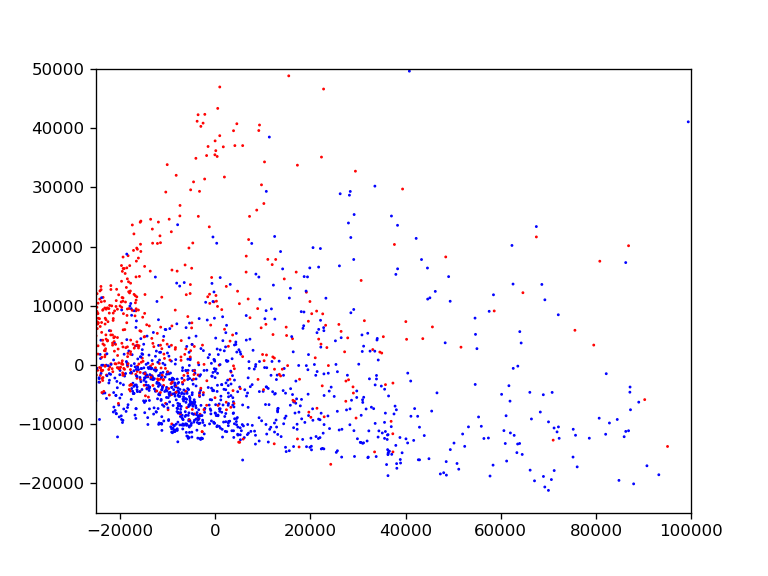

In [37]:
plt.figure()
colors = ['red','blue']
plt.scatter(x_data_pca_2d[:,0],x_data_pca_2d[:,1],c = s_data, cmap=matplotlib.colors.ListedColormap(colors), marker=".", s = 2)
plt.xlim(-25000,100000)
plt.ylim(-25000,50000)
plt.show()

<IPython.core.display.Javascript object>


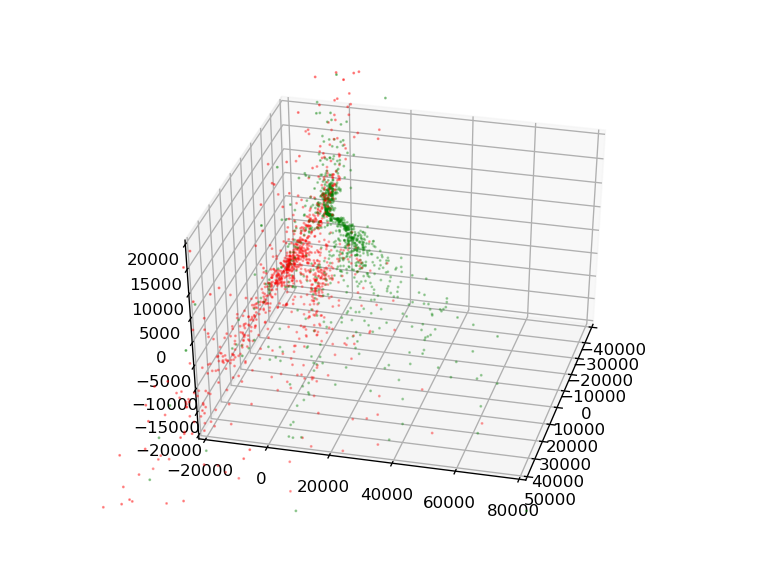

In [38]:
fig = plt.figure()
colors = ['green','red']
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x_data_pca_3d[:, 0], x_data_pca_3d[:, 1], x_data_pca_3d[:, 2], c = s_data , marker = ".", s = 2,cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlim(-40000,50000)
ax.set_ylim(-20000,80000)
ax.set_zlim(-20000,20000)
plt.show()

In [19]:
x_data_tsne_2d = tsne(x_data,n_dim = 2)

<IPython.core.display.Javascript object>


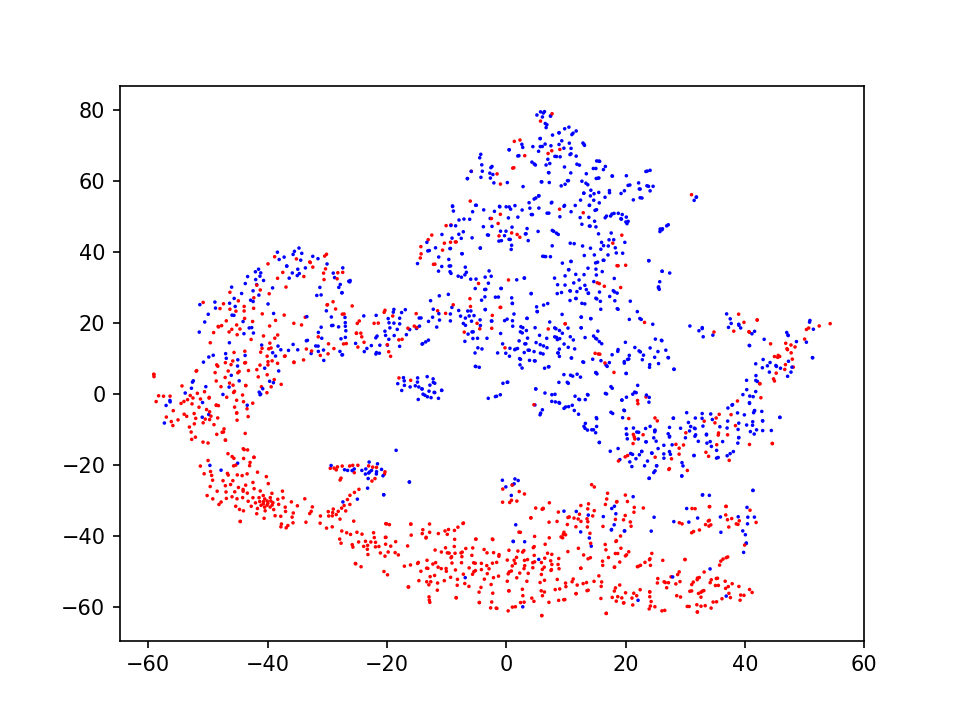

In [21]:
plt.figure()
colors = ['red','blue']
plt.scatter(x_data_tsne_2d[:,0],x_data_tsne_2d[:,1],c = s_data, cmap=matplotlib.colors.ListedColormap(colors), marker=".", s = 2)
#plt.xlim(-25000,100000)
#plt.ylim(-25000,50000)
plt.show()

In [30]:
x_data_tsne_3d = tsne(x_data,n_dim = 3)

<IPython.core.display.Javascript object>


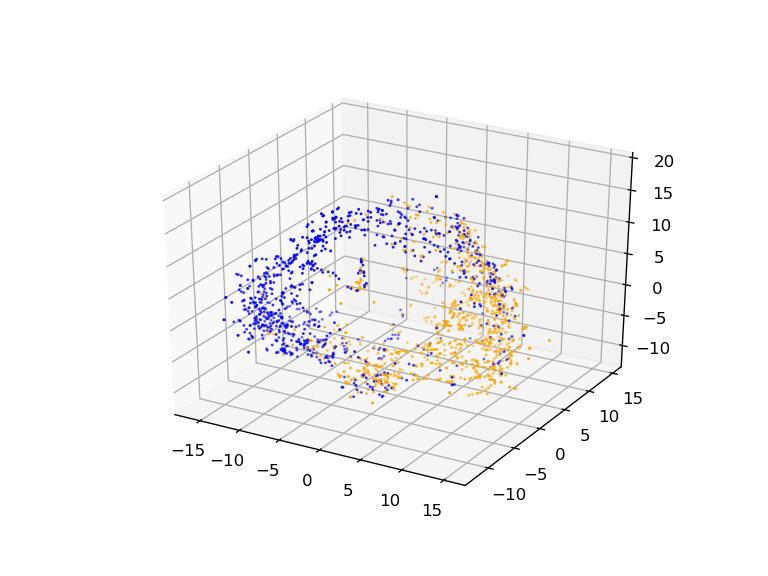

In [33]:
fig = plt.figure()
colors = ['blue','orange']
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x_data_tsne_3d[:, 0], x_data_tsne_3d[:, 1], x_data_tsne_3d[:, 2], c = s_data , marker = ".", s = 2,cmap=matplotlib.colors.ListedColormap(colors))
#ax.set_xlim(-40000,50000)
#ax.set_ylim(-20000,80000)
#ax.set_zlim(-20000,20000)
plt.show()